# Introduction

IN PROGRESS 
In this project I will examine the relationship between a countries GDP and its life expectancy with the help of seaborn and pd.
We will try to answer if there is any relationship and how the data has changed over time.
Are there any abnormalities?

In [92]:
#import all important modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
%matplotlib inline

#examine the given dataframe, sourced from codeacademy
df = pd.read_csv("all_data.csv")
#rename life expectancy 
df.rename(columns={'Life expectancy at birth (years)': 'Life_Exp'}, inplace=True)
print(df.head())
print(df.Country.unique())

  Country  Year  Life_Exp           GDP
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


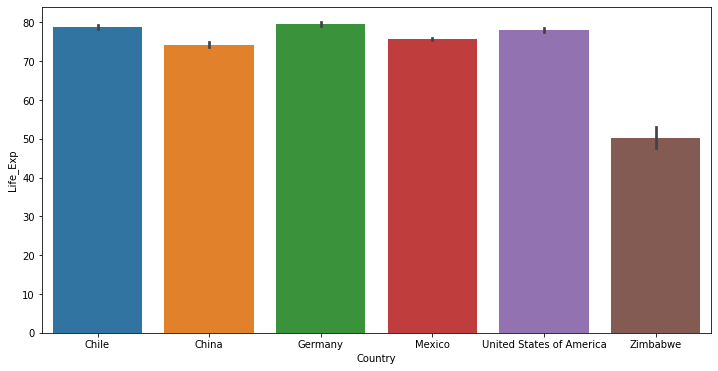

In [93]:

#create a boxplt to compare mean LifeExp between countries
plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='Life_Exp', data=df)
plt.show()

<AxesSubplot:xlabel='GDP', ylabel='Country'>

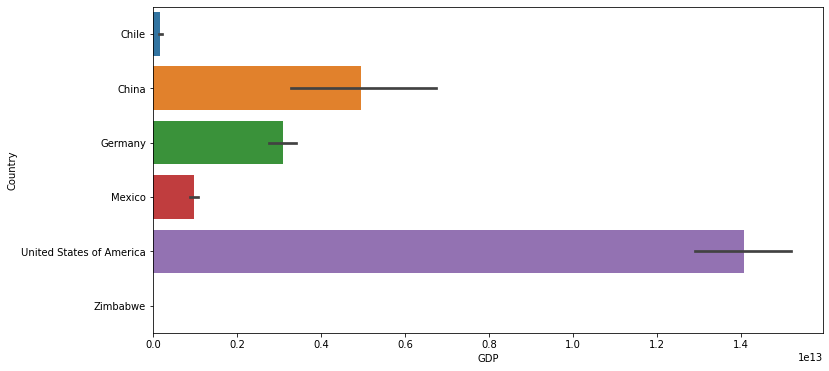

In [94]:
#create a boxplt to compare mean GDP between countries
plt.figure(figsize=(12,6))
sns.barplot(x='GDP', y='Country', data=df)

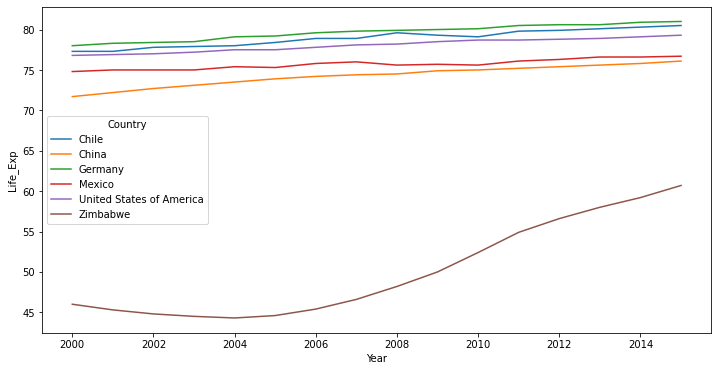

In [95]:
plt.figure(figsize=(12,6))
sns.lineplot(y='Life_Exp',x='Year', data=df, hue='Country')
plt.show()

Seems like Zimbabwe is rising in the last years, lets compare the gdp of the countries

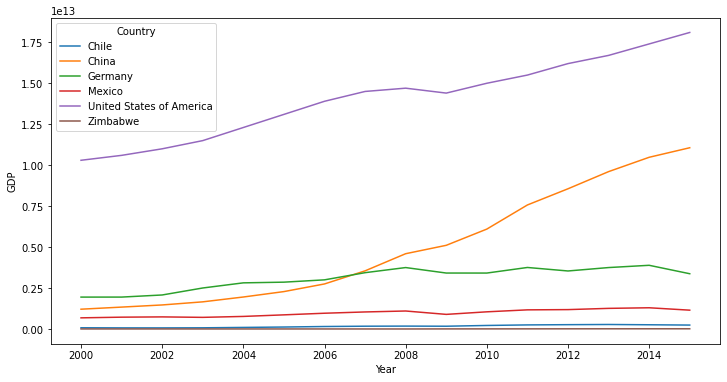

In [96]:
plt.figure(figsize=(12,6))
sns.lineplot(y='GDP', x='Year', data=df, hue='Country')
plt.show()

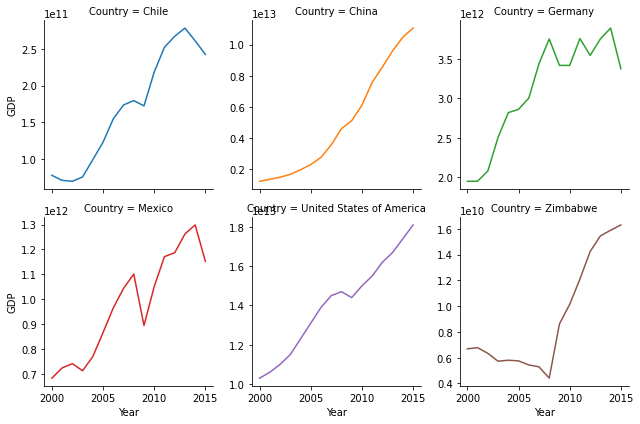

In [119]:
gdp_grid = sns.FacetGrid(df, col="Country", hue='Country', sharey=False, col_wrap=3)
gdp_grid.map_dataframe(sns.lineplot, x='Year', y='GDP')
plt.show()

Seems like gdp is risng similar in all countries, lets see if the growth of the gdp of Zimbabwe had influenced the life epeectency stronger percent wise.


In [120]:
#norm the gdp data and life expectancy from 0 to 1 for each year 
#plot normed data in one plot
countries = df.Country.unique()
print(countries)
#create new normed column
df['GDP_normed'] = 0
df['Life_Exp_normed'] = 0
#create normed columns in pd
for str in countries:
    df['GDP_normed' + str] = df.GDP[df.Country == str] / sum(df.GDP[df.Country == str])
    df['Life_Exp_normed' + str] = df.Life_Exp[df.Country == str] / sum(df.Life_Exp[df.Country == str])
    #drop empty values
    df['GDP_normed' + str] = df['GDP_normed' + str].replace(np.nan,0)
    df['Life_Exp_normed' + str] = df['Life_Exp_normed' + str].replace(np.nan,0)
    #join columns in GDP_normed
    df['GDP_normed'] = df['GDP_normed'] + df['GDP_normed' + str]
    df['Life_Exp_normed'] = df['Life_Exp_normed'] + df['Life_Exp_normed' + str]
    #all subcolumns can theoretically be deleted


        



['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [121]:
#test if worked fine
print(sum(df.GDP_normed))
print(sum(df.Life_Exp_normed))

6.0
6.000000000000002


lets create some subplots to see if the rise of GDP had an abnormal effect on Zimbabwe

<AxesSubplot:xlabel='GDP_normed', ylabel='Life_Exp_normed'>

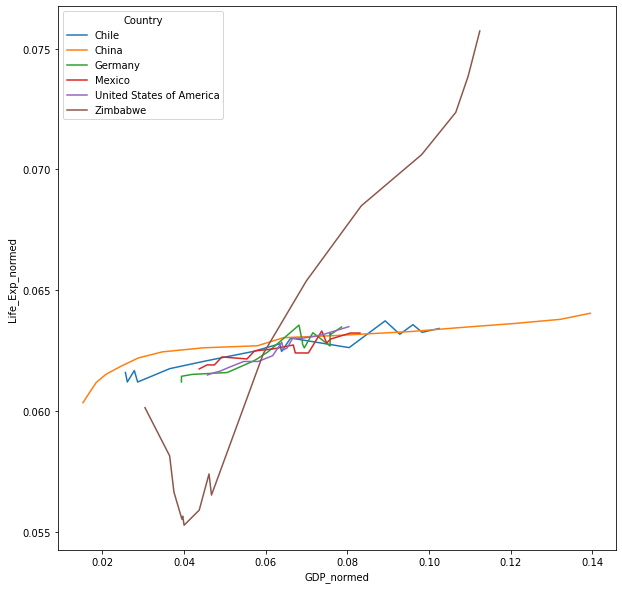

In [128]:
plt.figure(figsize=(10,10))
sns.lineplot(data= df, y='Life_Exp_normed', x='GDP_normed', hue='Country')

Seems like GDP has a stronger effect on Zimbabwe